<a href="https://colab.research.google.com/github/prtxz/DIRIGO-Chatbot-/blob/main/DIRIGO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from google.colab import drive


In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path_professors = '/content/drive/My Drive/DIRIGO_ML/professors.csv'
file_path_labs = '/content/drive/My Drive/DIRIGO_ML/labs.csv'

In [ ]:
professors_df = pd.read_csv(file_path_professors)
labs_df = pd.read_csv(file_path_labs)

In [ ]:
print("Professors DataFrame:")
print(professors_df.head())
print("\nLabs DataFrame:")
print(labs_df.head())

Professors DataFrame:
               name  room  floor              department
0       David Joyce   403      4        Computer Science
1      Brian Powell   362      5                 Physics
2      Rebecca Rose   101      5                 Physics
3    Andrew Wheeler   108      5        Computer Science
4  Jennifer Cabrera   399      5  Mechanical Engineering

Labs DataFrame:
                lab_name  room  floor              subject
0   Carl Friedrich Gauss   336      1          Mathematics
1        Tim Berners-Lee   105      2      Cloud Computing
2              Vint Cerf   393      3      Cloud Computing
3      Rosalind Franklin   427      3         Biochemistry
4           Nikola Tesla   254      3  Electrical Circuits


In [ ]:
training_data = [
    ("Where can I meet the professor?", "professor"),
    ("What is the room number for a professor?", "professor"),
    ("Where is the lab for Physics?", "labs"),
    ("Which subject is Galileo Lab related to?", "labs"),
    ("Locate the professor's office.", "professor"),
    ("Where is the Robotics Lab?", "labs"),
    ("Tell me about Tesla Lab.", "labs"),
    ("Find Analog Circuits lab.", "labs"),
]


In [ ]:
queries, labels = zip(*training_data)
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(queries)
y = labels

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(kernel="linear"),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
}

In [ ]:
results = {}
trained_models = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[model_name] = model
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    results[model_name] = accuracy
    print(f"\n{model_name} Classification Report:\n")
    print(classification_report(y_test, predictions))



Naive Bayes Classification Report:

              precision    recall  f1-score   support

        labs       1.00      1.00      1.00         1
   professor       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2


Logistic Regression Classification Report:

              precision    recall  f1-score   support

        labs       0.50      1.00      0.67         1
   professor       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2


SVM Classification Report:

              precision    recall  f1-score   support

        labs       1.00      1.00      1.00         1
   professor       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Random Forest Classification Report:

              precision    recall  f1-score   support

        labs       1.00      1.00      1.00         1
   professor       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [ ]:
print("\nAccuracy Comparison:")
for model_name, accuracy in results.items():
    print(f"{model_name}: {accuracy:.2f}")


Accuracy Comparison:
Naive Bayes: 1.00
Logistic Regression: 0.50
SVM: 1.00
Decision Tree: 1.00
Random Forest: 1.00


In [ ]:
best_model_name = max(results, key=results.get)
best_model = trained_models[best_model_name]
print(f"\nUsing {best_model_name} as the chatbot's model.\n")



Using Naive Bayes as the chatbot's model.



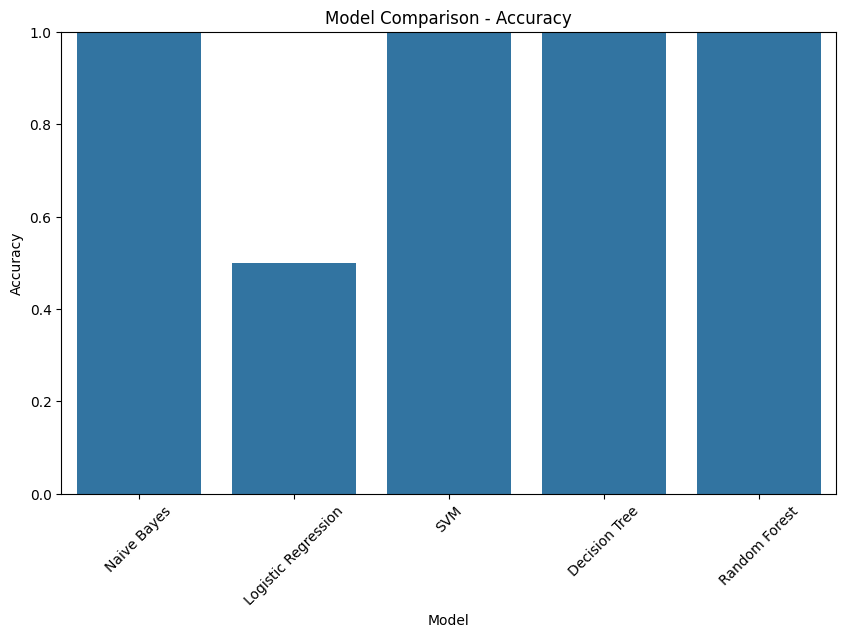

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title('Model Comparison - Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

In [ ]:
def DIRIGO_response(user_input):
    # Transform the user input using the vectorizer
    user_vector = vectorizer.transform([user_input.lower()])

    # Set Naive Bayes as the best model
    best_model = trained_models["Naive Bayes"]  # Using Naive Bayes since it gives the best accuracy
    query_type = best_model.predict(user_vector)[0]
    response = ""

    # If the query is about professors
    if query_type == "professor":
        for _, row in professors_df.iterrows():
            if row["name"].lower() in user_input.lower():
                response = f"You can meet {row['name']} in room {row['room']} on the {row['floor']} floor of the {row['department']} department."
                break

    # If the query is about labs
    elif query_type == "labs":
        found_lab = False  # Flag to track if a lab was found

        # Loop through labs_df to search for relevant lab
        for _, row in labs_df.iterrows():
            lab_name = str(row["lab_name"]).lower()
            subject = str(row["subject"]).lower()

            # Check if either lab_name or subject is part of the user input
            if lab_name in user_input.lower() or subject in user_input.lower():
                found_lab = True
                if 'department' in row and pd.notna(row['department']):
                    response = f"The {row['lab_name']} lab is located in room {row['room']} on the {row['floor']} floor of the {row['department']} department."
                else:
                    response = f"The {row['lab_name']} lab is located in room {row['room']} on the {row['floor']} floor."
                break  # Exit loop after finding the first match

        if not found_lab:
            response = "Sorry, I couldn't find the lab you're looking for."

    # If no relevant query type is found
    if not response:
        response = "Sorry, I couldn't find the information you're looking for."

    return response

# Test chatbot functionality
print("DIRIGO is ready! Type 'exit' to quit.\n")
while True:
    user_message = input("You: ")

    # Exit condition
    if user_message.lower() in ["exit", "quit"]:
        print("DIRIGO: Goodbye!")
        break

    # Print the response
    print(f"DIRIGO: {DIRIGO_response(user_message)}")


DIRIGO is ready! Type 'exit' to quit.

